Epoch 0: Loss = 167299.40, w = 6.5674, b = 0.0764
Epoch 1: Loss = 14202.18, w = 4.6617, b = 0.0542
Epoch 2: Loss = 1311.21, w = 5.2147, b = 0.0606
Epoch 3: Loss = 225.78, w = 5.0542, b = 0.0587
Epoch 4: Loss = 134.39, w = 5.1008, b = 0.0593
Epoch 5: Loss = 126.69, w = 5.0873, b = 0.0591
Epoch 6: Loss = 126.04, w = 5.0912, b = 0.0592
Epoch 7: Loss = 125.99, w = 5.0901, b = 0.0591
Epoch 8: Loss = 125.98, w = 5.0904, b = 0.0591
Epoch 9: Loss = 125.98, w = 5.0903, b = 0.0591
Epoch 10: Loss = 125.98, w = 5.0903, b = 0.0591
Epoch 11: Loss = 125.98, w = 5.0903, b = 0.0591
Epoch 12: Loss = 125.98, w = 5.0903, b = 0.0591
Epoch 13: Loss = 125.98, w = 5.0903, b = 0.0591
Epoch 14: Loss = 125.98, w = 5.0903, b = 0.0591
Epoch 15: Loss = 125.98, w = 5.0903, b = 0.0591
Epoch 16: Loss = 125.98, w = 5.0903, b = 0.0591
Epoch 17: Loss = 125.98, w = 5.0903, b = 0.0591
Epoch 18: Loss = 125.98, w = 5.0903, b = 0.0591
Epoch 19: Loss = 125.98, w = 5.0903, b = 0.0591
Epoch 20: Loss = 125.98, w = 5.0903, b = 0.0

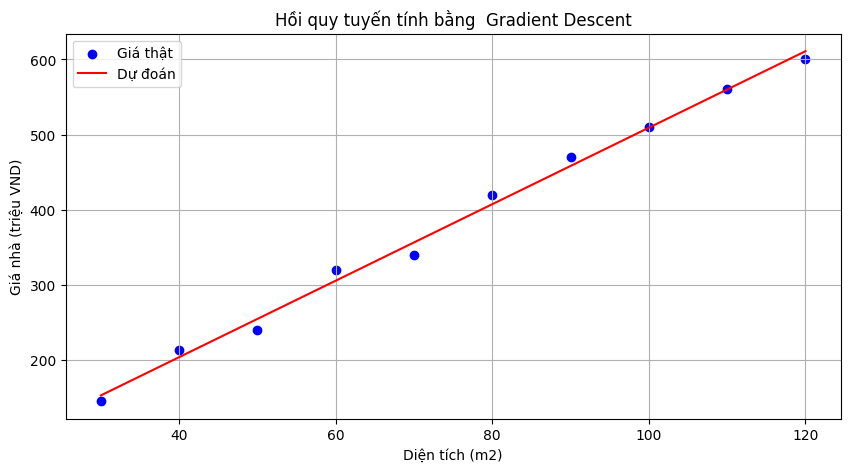

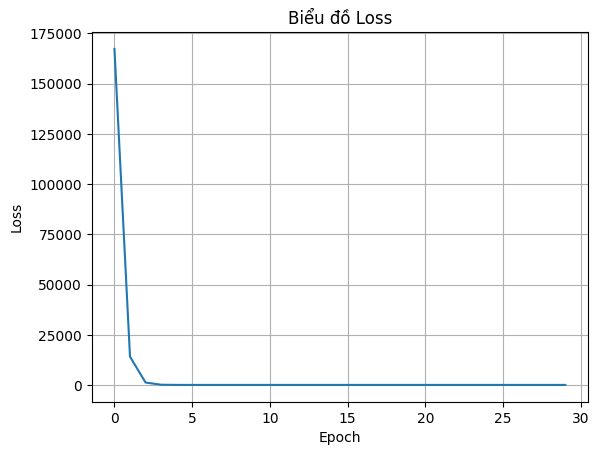

In [ ]:
# Hồi quy tuyến tính cho 1 biến

import numpy as np
import matplotlib.pyplot as plt

# Dữ liệu giả lập
x = np.array([30, 40, 50, 60, 70, 80, 90, 100, 110, 120])
y = np.array([145, 213, 240, 320, 340, 420, 470, 510, 560, 600])

# khởi tạo tham số
w = 0.0
b = 0.0
lr = 0.0001 # learning rate, tùy chỉnh sao cho hợp lí
epochs = 30 # số vòng lặp

n =len(x)
loss_history = [] # để vẽ biểu đồ loss


for epoch in range(epochs):
  y_pred = w * x + b
  # Tính hàm mất mát
  error = y_pred - y
  loss = (1/n) * np.sum(error ** 2) # tính hàm mất mát bằng MSE
  loss_history.append(loss)


  # Tính đạo hàm
  dw = (2/n) * np.sum(error * x)
  db = (2/n) * np.sum(error)

  # Cập nhật tham số
  w -= lr * dw
  b -= lr * db

  # In ra mỗi 5 vòng lặp
  if epoch % 1 == 0:
    print(f"Epoch {epoch}: Loss = {loss:.2f}, w = {w:.4f}, b = {b:.4f}")

print("\n Kết quả cuối cùng:")
print(f"w = {w:.4f}, b = {b:.4f}")

# Dự đoán mô hình
y_pred = w * x + b

# Vẽ biểu đồ dự đoán so với dữ liệu gốc
plt.figure(figsize=(10, 5))
plt.scatter(x, y, color='blue', label = 'Giá thật')
plt.plot(x, y_pred, color='red', label='Dự đoán')
plt.xlabel('Diện tích (m2)')
plt.ylabel('Giá nhà (triệu VND)')
plt.legend()
plt.title('Hồi quy tuyến tính bằng  Gradient Descent')
plt.grid(True)
plt.show()

# Vẽ biểu đồ Loss
plt.plot(loss_history)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Biểu đồ Loss')
plt.grid(True)
plt.show()

In [ ]:
# Hồi quy tuyến tính cho nhiều biến

import numpy as np

class LinearRegression:
  # Constructor
  def __init__(self, learning_rate, epochs, verbose):
      self.learning_rate = learning_rate
      self.epochs = epochs
      self.verbose = verbose
      self.w = 0
      self.b = 0

  # hàm dự đoán predict
  def predict(self, X):
    # y^ = w.X + b
    # X: m x n | w: n x 1 ==> X * w !== w * X
    return np.dot(X, self.w) + self.b


  def compute_loss(self, y_pred, y_true):
    return np.mean((y_pred - y_true) ** 2)

  def fit(self, X, y):
    # Khởi tạo trọng số ban đầu
    m, n = X.shape
    self.w = np.zeros(n)
    self.b = 0

    # huấn luyện
    for epoch in range(self.epochs):

      # Tính y dự đoán
      y_pred  = self.predict(X)

      # Tính sai số
      error = y_pred - y

      # Tính gradient
      dw = (2 / m) * np.dot(X.T, error)
      db = (2 / m) * np.sum(error)

      # Cập nhật trọng số
      self.w = self.w - self.learning_rate * dw
      self.b = self.b - self.learning_rate * db

      # In ra màn hình:
      if self.verbose and epoch % 10:
        loss = self.compute_loss(y_pred, y)
        print(f"Epoch {epoch}, Loss = {loss}")

  def get_param(self):
    return self.w, self.b

X = np.array([
    [50, 2],
    [80, 3],
    [120, 4],
    [100, 3],
    [60, 2]
], dtype=np.float32)

y = np.array([100, 150, 250, 200, 120], dtype=np.float32)

model = LinearRegression(0.00001, 100, True)
model.fit(X, y)

w, b = model.get_param()
print("Trọng số:", w)
print("Bias:", b)

Epoch 1, Loss = 21711.71289234112
Epoch 2, Loss = 15779.326319540367
Epoch 3, Loss = 11470.80850954993
Epoch 4, Loss = 8341.658796539043
Epoch 5, Loss = 6069.049427198552
Epoch 6, Loss = 4418.520104125209
Epoch 7, Loss = 3219.7892127585
Epoch 8, Loss = 2349.1862273058955
Epoch 9, Loss = 1716.8928841264544
Epoch 11, Loss = 924.1616943694438
Epoch 12, Loss = 681.9394579139505
Epoch 13, Loss = 506.0205614238759
Epoch 14, Loss = 378.25582964793756
Epoch 15, Loss = 285.4640506753879
Epoch 16, Loss = 218.07209817786278
Epoch 17, Loss = 169.1272922106581
Epoch 18, Loss = 133.58010592586274
Epoch 19, Loss = 107.76321656584165
Epoch 21, Loss = 75.39552395035938
Epoch 22, Loss = 65.50542485393692
Epoch 23, Loss = 58.322522910157986
Epoch 24, Loss = 53.10577859394986
Epoch 25, Loss = 49.31699670476002
Epoch 26, Loss = 46.56530190585236
Epoch 27, Loss = 44.56681294241109
Epoch 28, Loss = 43.115355212813064
Epoch 29, Loss = 42.06119017098249
Epoch 31, Loss = 40.73950361863574
Epoch 32, Loss = 40.33